##### Dependencies

In [1]:
import numpy as np
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##### Load & Prepeare Data

In [2]:
# Load and preprocess the data
df = pd.read_csv('Dataset/india_vix.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df.drop(['Open', 'High', 'Low', 'Change', 'Close', 'Pchange'], axis=1, inplace=True)
# df = df[:3000]
df.head()

,PrevClose
Date,
2016-01-01,13.8700
2016-01-04,14.2600
2016-01-05,16.8350
2016-01-06,16.7025
2016-01-07,16.5525


In [3]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.10)

##### Check for stationarity & calculating d, p & q

In [4]:
result = adfuller(df)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -3.681687159962457
p-value: 0.00437823975621873
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [5]:
df_diff1 = df.diff().dropna()
result = adfuller(df_diff1)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -10.388747288922575
p-value: 2.047143912037154e-18
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


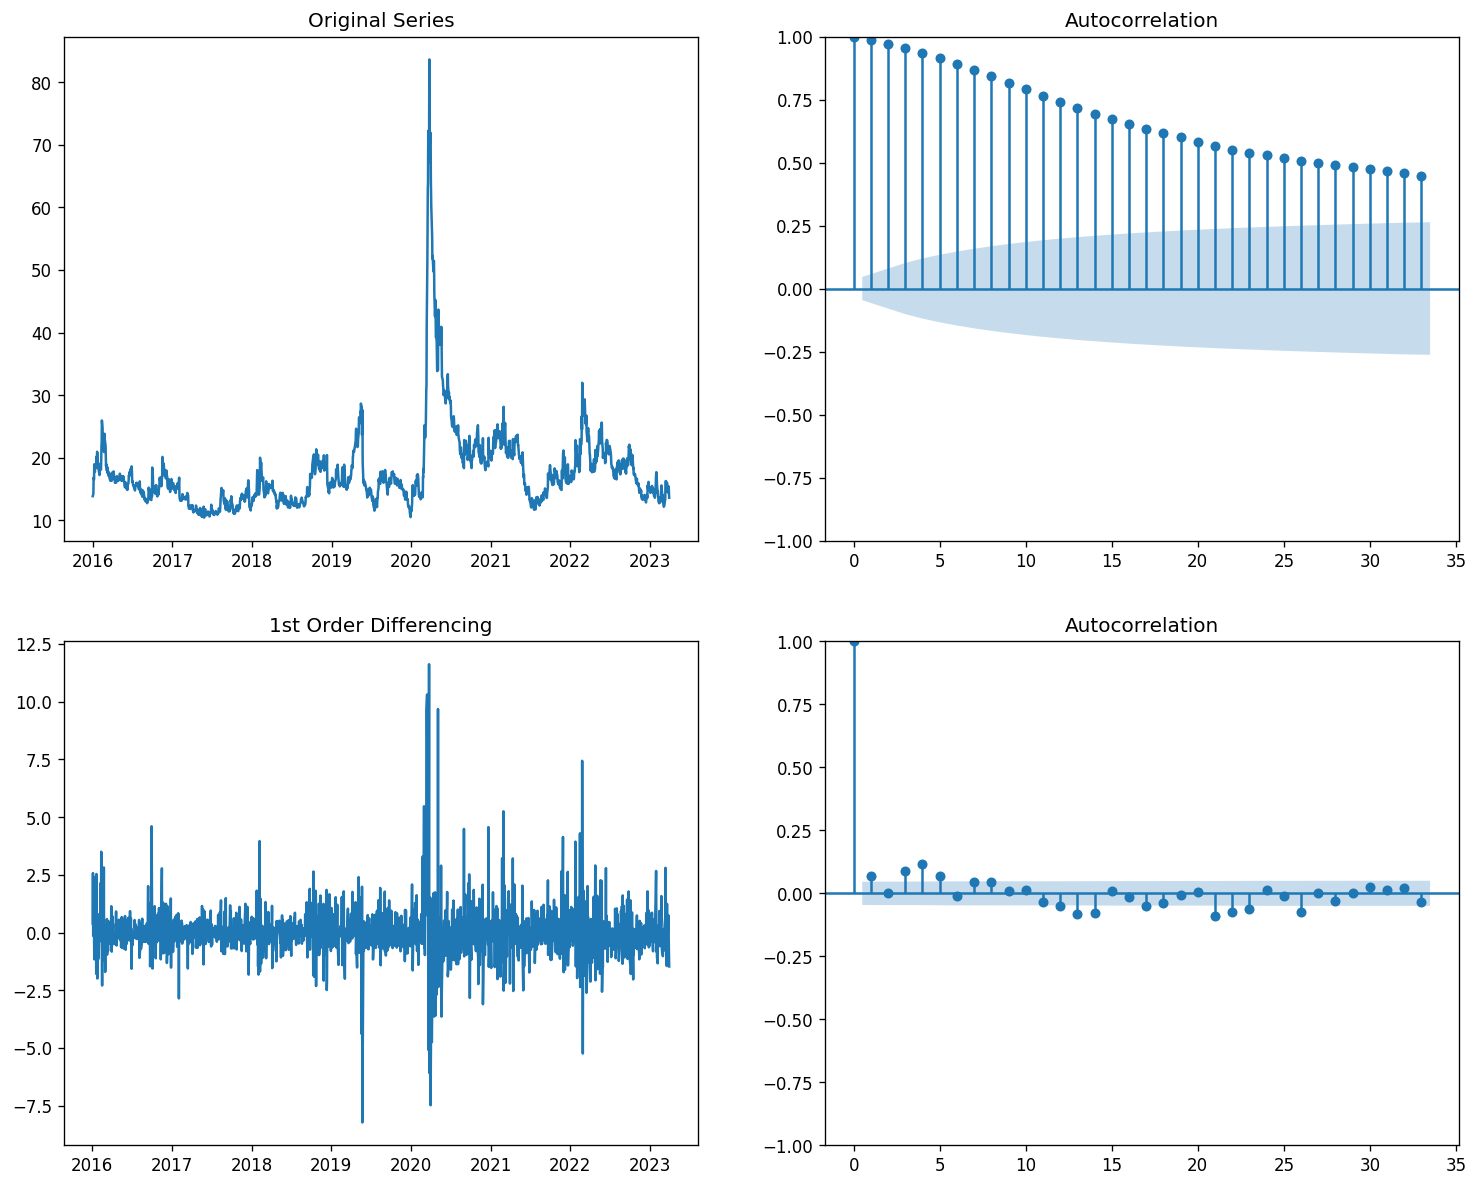

In [6]:
plt.rcParams.update({'figure.figsize':(15,12), 'figure.dpi':120})
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

axes[1, 0].plot(df_diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_diff1, ax=axes[1, 1])

plt.show()

/home/bluebooks/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


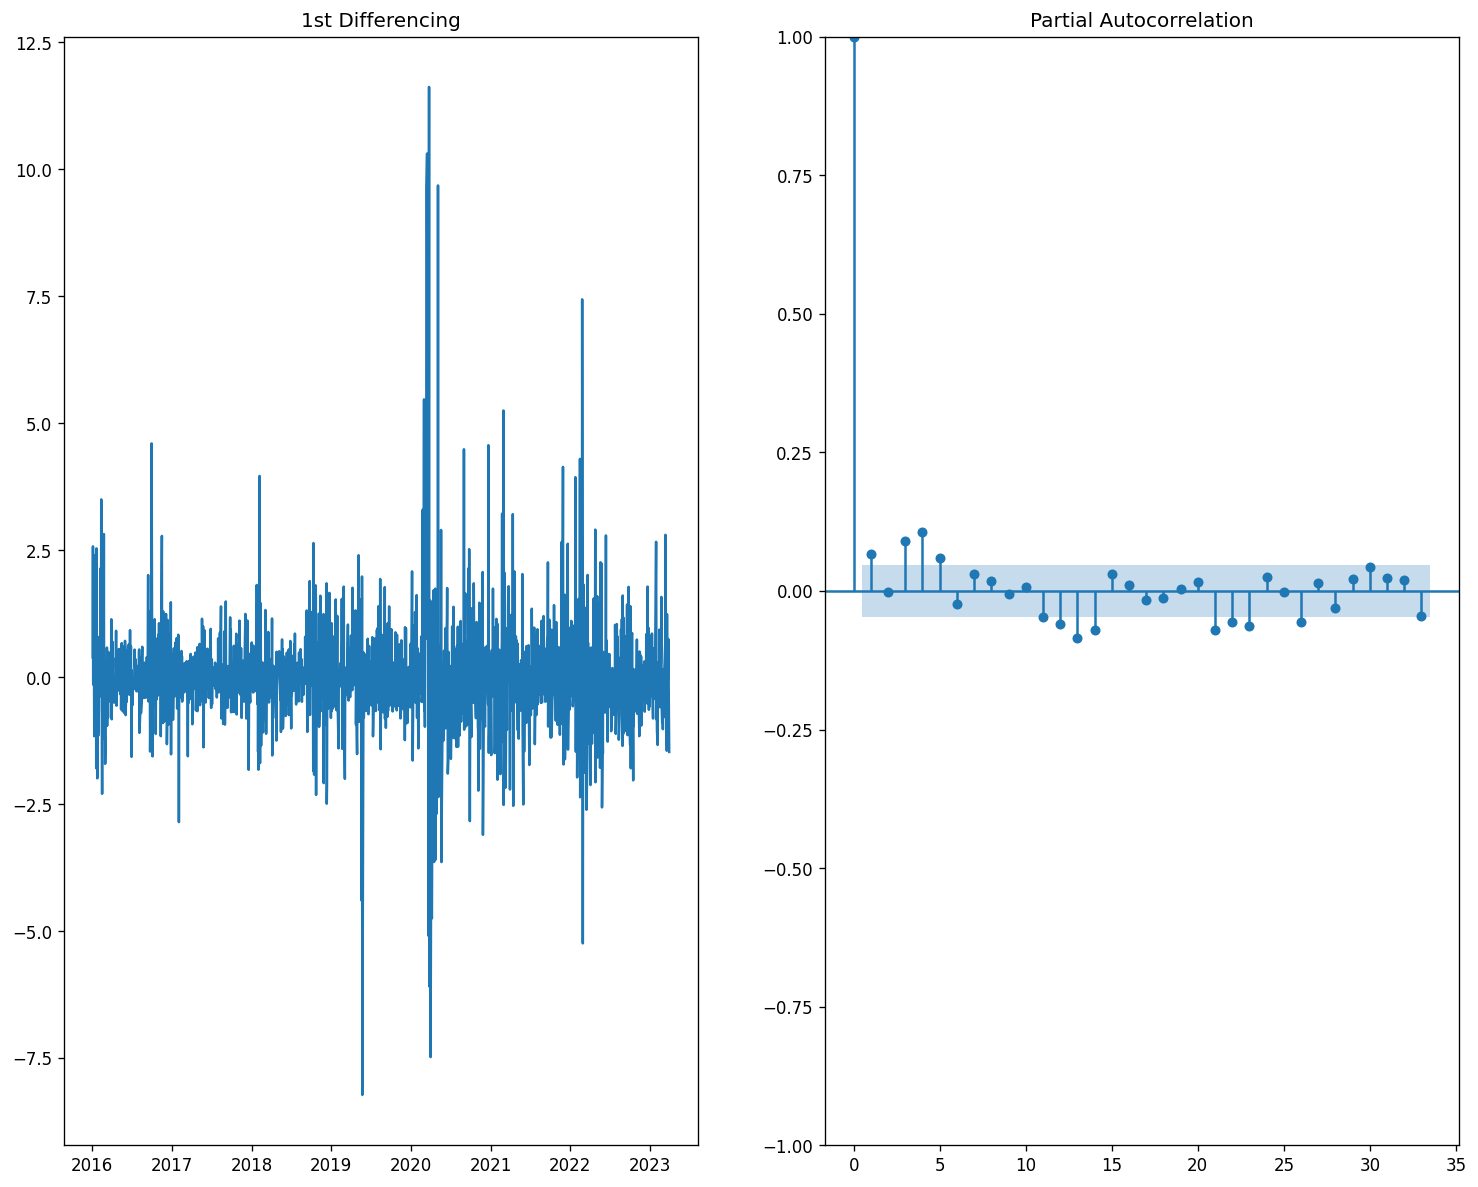

In [7]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,12), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df_diff1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_diff1, ax=axes[1])

plt.show()

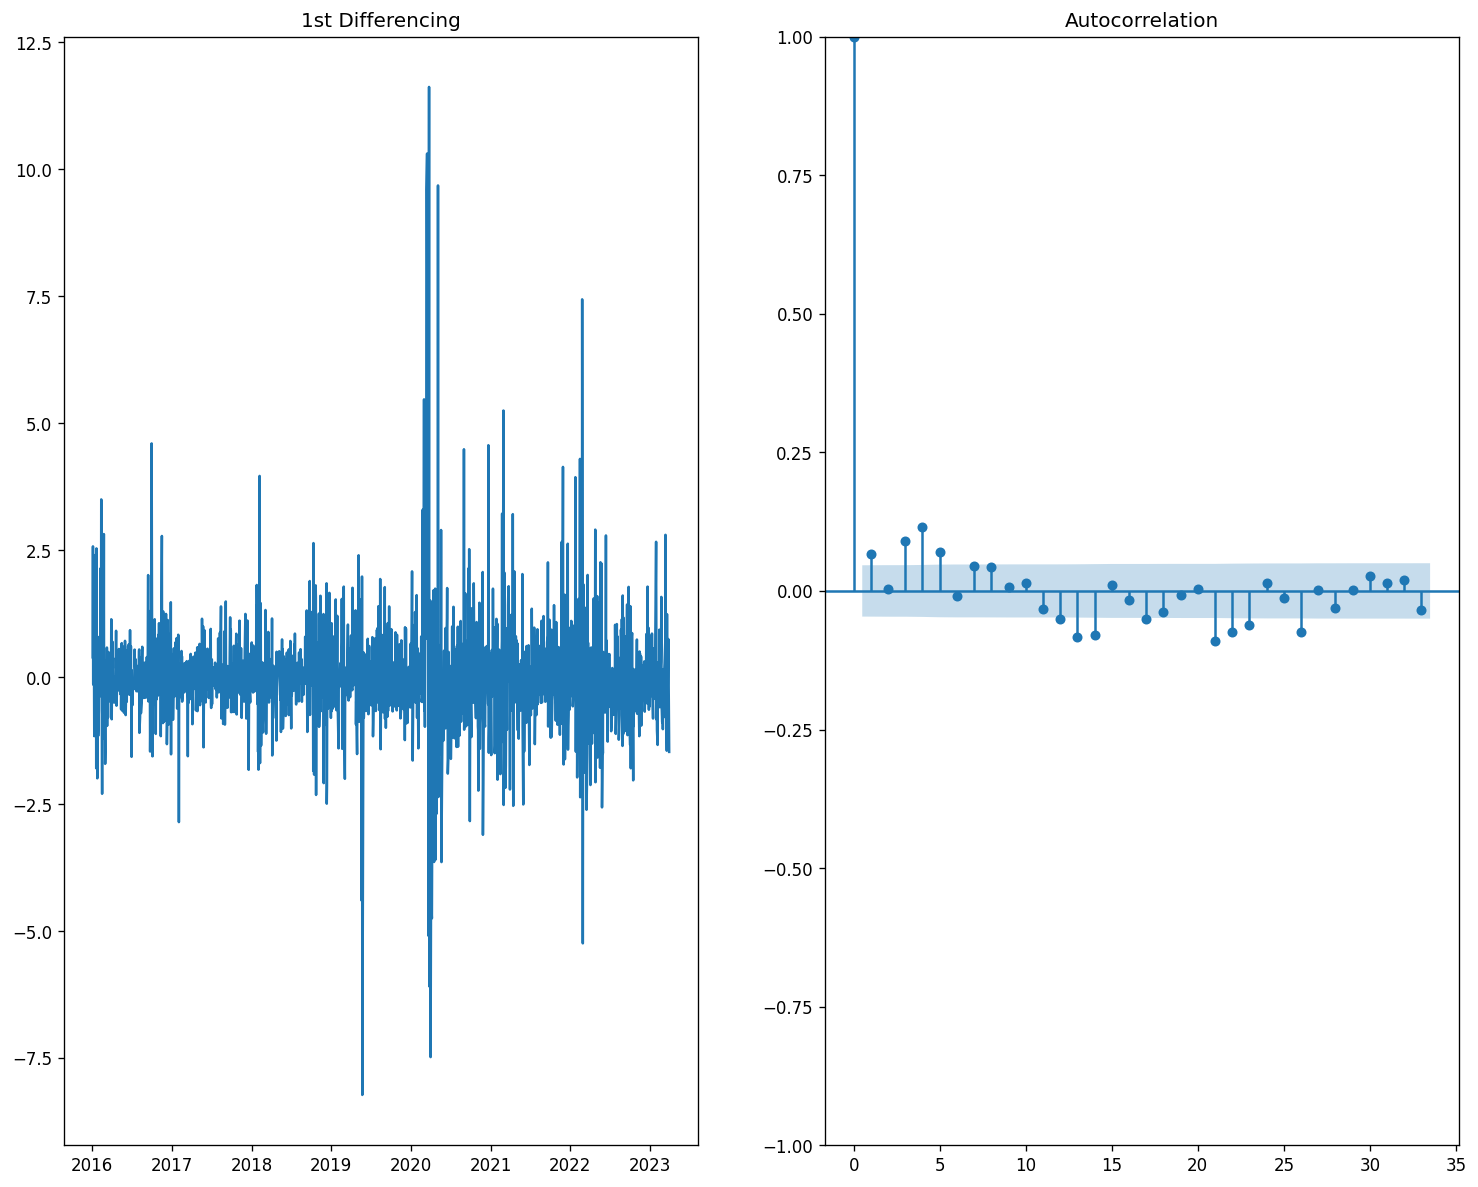

In [8]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,12), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df_diff1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_acf(df_diff1, ax=axes[1])

plt.show()

As we get stationary in 1st differentiation hence value of d is 1
As we have more than 2 lags above significance line therefore p & q are both 2

##### Fit ARIMA model

In [9]:
model = pm.auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5163.208, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14143.719, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12036.749, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5163.805, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5164.963, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=10367.562, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5165.543, Time=1.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5151.665, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9071.279, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5160.124, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5128.276, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5151.748, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AI

##### Prediction

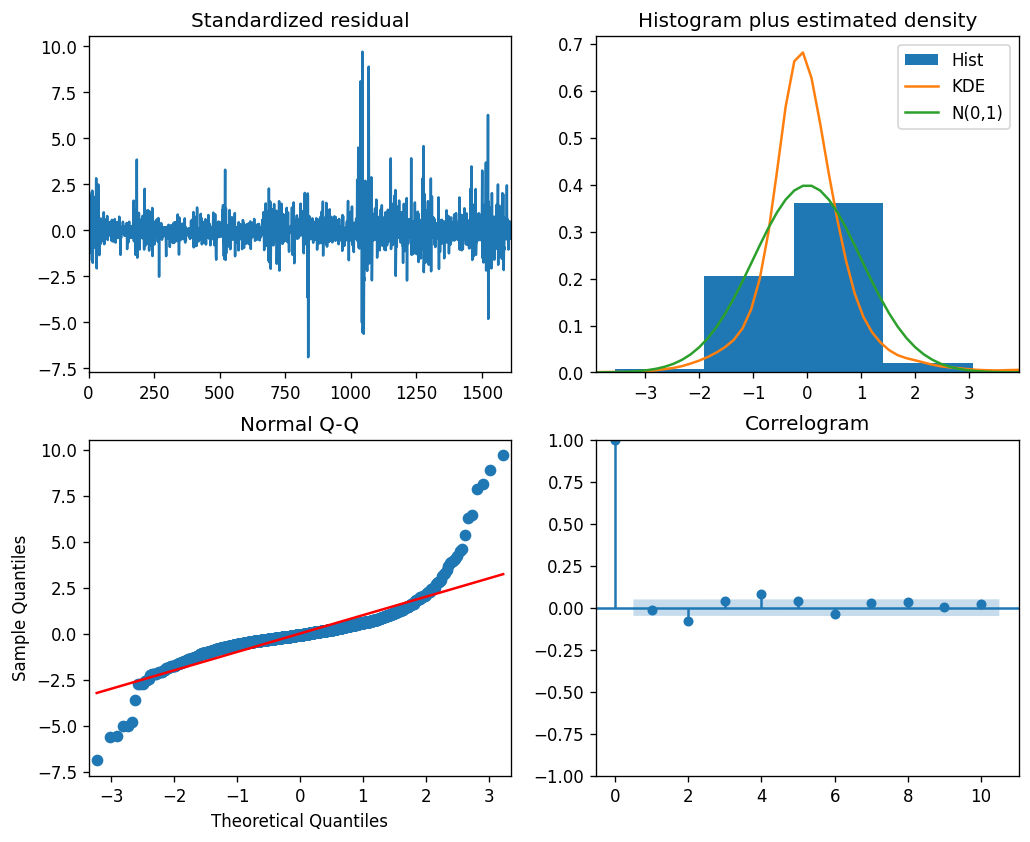

In [10]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [11]:
# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data))

/home/bluebooks/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
# Create a DataFrame for the predictions with the same index as the test data
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
predictions_df.index = test_data.index

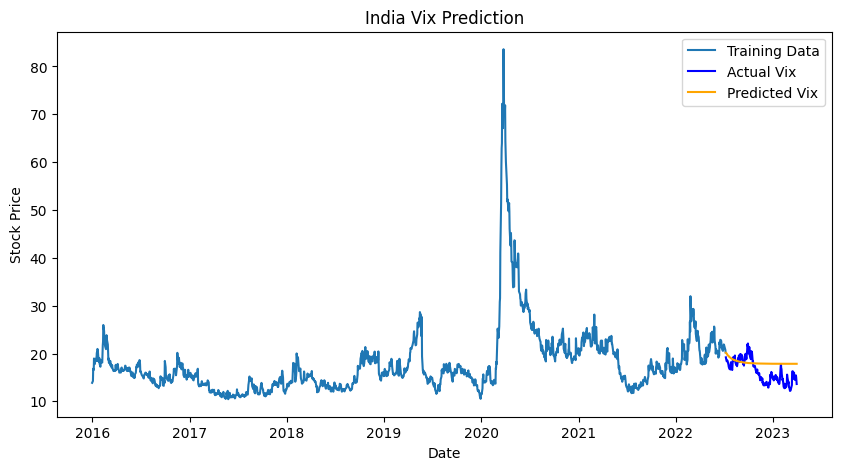

In [13]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color = 'blue', label='Actual Vix')
plt.plot(predictions_df, color = 'orange', label='Predicted Vix')
plt.title('India Vix Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

/home/bluebooks/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


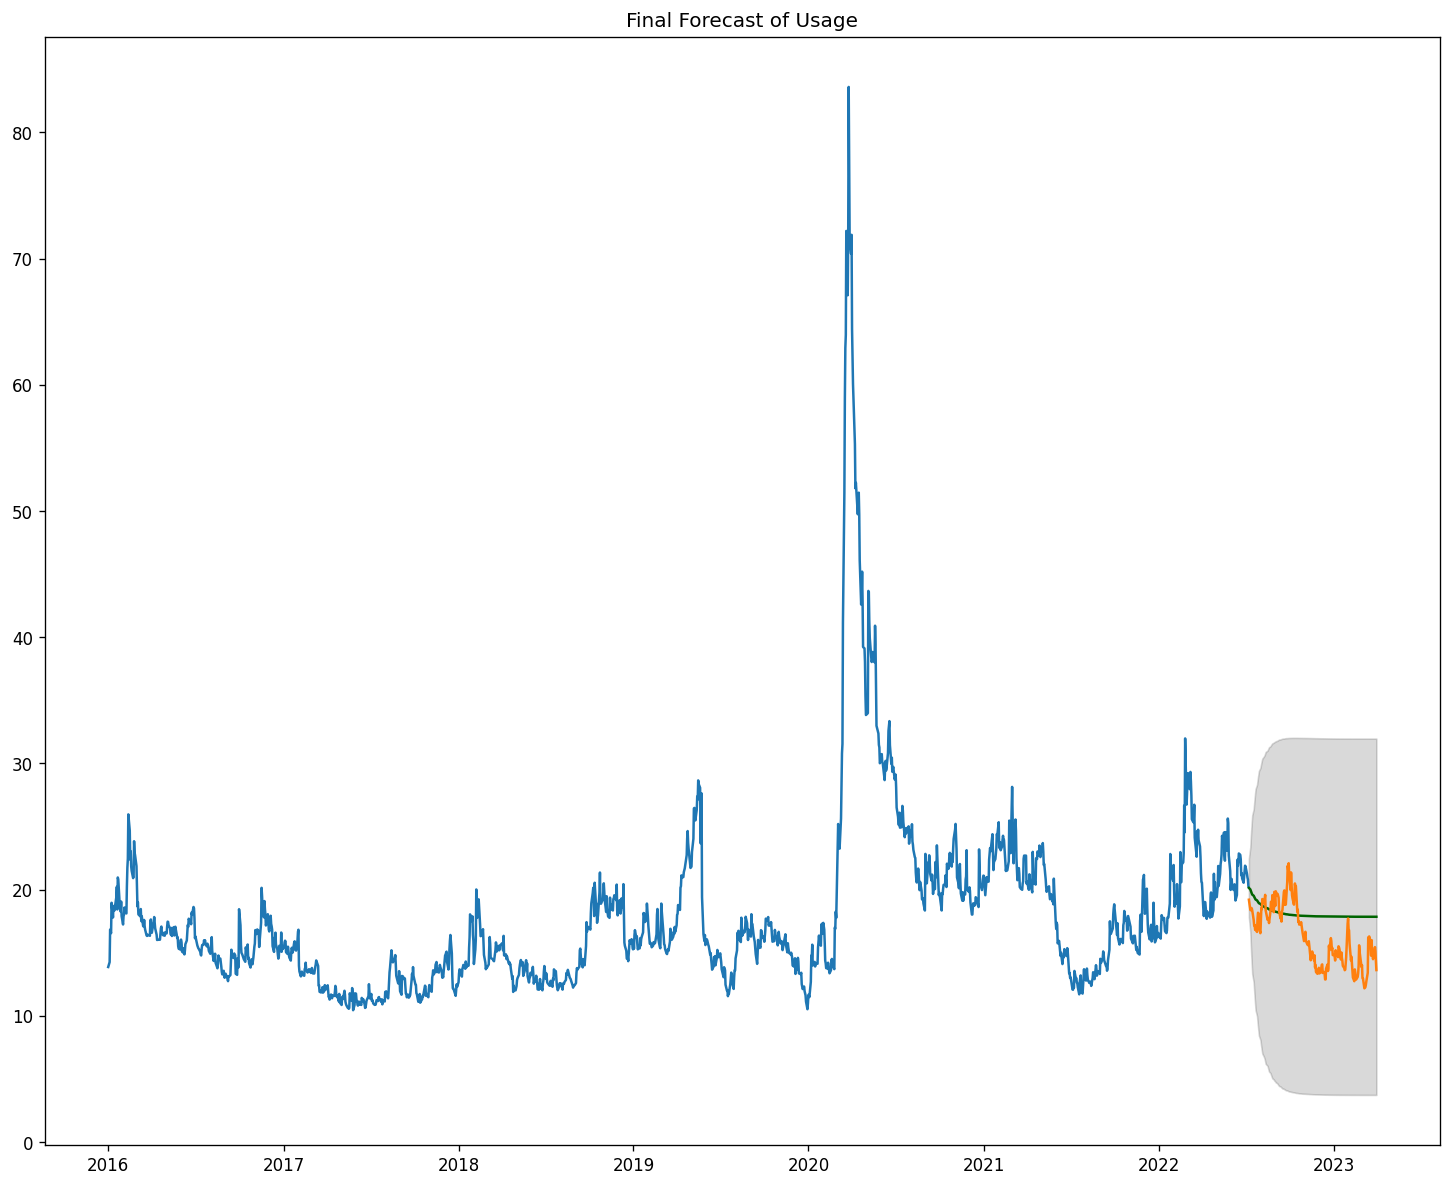

In [14]:
# Forecast
n_periods = test_data.shape[0]
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc)
fc_series.index = test_data.index
lower_series = pd.Series(confint[:, 0], index=test_data.index)
upper_series = pd.Series(confint[:, 1], index=test_data.index)

# Plot
plt.plot(train_data)
plt.plot(fc_series, color='darkgreen')
plt.plot(test_data)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [15]:
print(confint)

[[17.82652758 22.45196114]
 [16.65177005 23.38641415]
 [15.68074762 24.13210511]
 [14.8219744  24.77939439]
 [14.04237925 25.36032545]
 [13.32582725 25.89009412]
 [12.66293242 26.37722753]
 [12.04749389 26.82714044]
 [11.47499009 27.24363423]
 [10.94186208 27.62960744]
 [10.44514368 27.98742018]
 [ 9.98225882 28.31909169]
 [ 9.55090546 28.62641203]
 [ 9.14898645 28.91100709]
 [ 8.77456704 29.17437742]
 [ 8.42584779 29.41792203]
 [ 8.10114674 29.64295318]
 [ 7.79888706 29.85070604]
 [ 7.51758817 30.04234516]
 [ 7.25585886 30.21896903]
 [ 7.01239183 30.38161365]
 [ 6.7859589  30.53125539]
 [ 6.57540687 30.66881356]
 [ 6.37965366 30.79515274]
 [ 6.19768463 30.91108509]
 [ 6.02854918 31.01737255]
 [ 5.87135735 31.11472909]
 [ 5.72527668 31.20382287]
 [ 5.58952899 31.28527847]
 [ 5.46338749 31.35967903]
 [ 5.34617374 31.42756843]
 [ 5.23725496 31.48945336]
 [ 5.13604125 31.54580538]
 [ 5.04198307 31.59706296]
 [ 4.95456872 31.64363338]
 [ 4.87332199 31.68589463]
 [ 4.79779992 31.72419718]
 